# Table of Contents

## 01. Import Data and Libraries

## 02. Data Wrangling and Cleaning

## 03. Extreme Values

## 04. Choropleth

### - Number killed

### - Number injured

## 05. Results Analysis

## 06. Exporting Dataframe

---

## 01. Import Data and Libraries

In [12]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly.express as px

In [13]:
# uploading the US json file

country_geo= r'C:\Users\marze\Gun Violence\02 Data\Original Data\us-states.json'


In [14]:
country_geo

'C:\\Users\\marze\\Gun Violence\\02 Data\\Original Data\\us-states.json'

In [15]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [16]:
# looking at the JSON file contents:

f = open(r'C:\Users\marze\Gun Violence\02 Data\Original Data\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [17]:
# creating a path into a string variable
path = r'C:\Users\marze\Gun Violence'

In [18]:
# import the cleaned data from the last exercise 

gv_data= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.2_gun_violence_cleaned.csv'))

In [19]:
gv_data.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_type,...,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,latitude_bin,longitude_bin,location_combined,location combined
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4.0,3.0,4.0_3.0,0
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2.0,1.0,2.0_1.0,1
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4.0,3.0,4.0_3.0,0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,2.0,3.0_2.0,2
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Handgun||1::Handgun,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3.0,3.0,3.0_3.0,3


## 02. Data Wrangling and Cleaning

In [21]:
gv_data.dtypes

Unnamed: 0                    int64
incident_id                   int64
date                         object
state                        object
city_or_county               object
address                      object
n_killed                      int64
n_injured                     int64
congressional_district      float64
gun_type                     object
incident_characteristics     object
latitude                    float64
location_description         object
longitude                   float64
n_guns_involved             float64
notes                        object
participant_age              object
participant_age_group        object
participant_gender           object
participant_relationship     object
participant_status           object
participant_type             object
latitude_bin                float64
longitude_bin               float64
location_combined            object
location combined             int64
dtype: object

In [22]:
gv_data = gv_data.drop(columns=['Unnamed: 0', 'participant_relationship', 'location_combined', 'longitude_bin','latitude_bin', 
                               'gun_type'])

In [23]:
# will create new date and time columns for the dataset, such as year, month, and weekday
gv_data['date'] = pd.to_datetime(gv_data['date'])

In [24]:
gv_data['year'] = gv_data['date'].dt.year

In [25]:
gv_data['month'] = gv_data['date'].dt.month

In [26]:
gv_data['weekday'] = gv_data['date'].dt.weekday

In [27]:
gv_data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,...,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type,location combined,year,month,weekday
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,2013,1,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,1,2013,1,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,0,2013,1,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2,2013,1,5
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,2013,1,0


In [28]:
def generic_split(n) :                    
    generic_rows = []               
    generic_row = str(n).split("||")     
    for i in generic_row :              
        g_row = str(i).split("::")              
        if len(g_row) > 1 :         
            generic_rows.append(g_row[1])           
    return generic_rows

In [29]:
gv_data.dtypes

incident_id                          int64
date                        datetime64[ns]
state                               object
city_or_county                      object
address                             object
n_killed                             int64
n_injured                            int64
congressional_district             float64
incident_characteristics            object
latitude                           float64
location_description                object
longitude                          float64
n_guns_involved                    float64
notes                               object
participant_age                     object
participant_age_group               object
participant_gender                  object
participant_status                  object
participant_type                    object
location combined                    int64
year                                 int32
month                                int32
weekday                              int32
dtype: obje

In [30]:
gv_data=gv_data.rename(columns={'incident_id':'Incident_ID', 'date':'Date', 'state':'State', 'city_or_county':'City or County', 'address':'Address', 'n_killed':'Number Killed', 'n_injured':'Number Injured', 'congressional_district':'Congressional District', 'incident_characteristics':'Incident Characteristics', 'latitude':'Latitude', 'location_description':'Location Description',
                        'longitude':'Longitude', 'n_guns_involved':'Number of Guns Involved', 'notes':'Notes', 'participant_age':'Participant Age', 'participant_age_group':'Participant Age Group', 'participant_gender':'Participant Gender', 'participant_status':'Participant Status', 'participant_type':'Participant Type', 'location combined':'Location Combined', 'year':'Year',
                        'month':'Month', 'weekday':'Day'})

In [31]:
# Split the 'Participant Gender' into male and female
gv_data_gender = gv_data['Participant Gender'].apply(generic_split)

# Create new columns for total participants, male, and female using .loc 
gv_data.loc[:, "Total Participants"] = gv_data_gender.apply(lambda x: len(x))
gv_data.loc[:, "Male Participants"] = gv_data_gender.apply(lambda i: i.count("Male"))
gv_data.loc[:, "Female Participants"] = gv_data_gender.apply(lambda i: i.count("Female"))

In [32]:
# split "Participant Age Group"  in three different age groups: Child 0-11, Teen 12-17, Adult 18+ 
gv_data_age_group = gv_data['Participant Age Group'].apply(generic_split)
gv_data["Child Participants 0-11"] = gv_data_age_group.apply(lambda i: i.count("Child 0-11"))
gv_data["Teen Participants 12-17"] = gv_data_age_group.apply(lambda i: i.count("Teen 12-17"))
gv_data["Adult Participants 18+"] = gv_data_age_group.apply(lambda i: i.count("Adult 18+"))

In [33]:
# Replace NaN values with an empty string
gv_data['Participant Type'].fillna('', inplace=True)

C:\Users\marze\AppData\Local\Temp\ipykernel_20060\2281891226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gv_data['Participant Type'].fillna('', inplace=True)


In [34]:
# Function to count participants based on type
def count_participants(entry, participant_type):
    try:
        return len([p.split('::')[1] for p in entry.split('||') if participant_type in p])
    except IndexError:
        return 0

In [35]:
# Create columns for the count of victims and suspects
gv_data['Victim Count'] = gv_data['Participant Type'].apply(lambda x: count_participants(x, 'Victim'))
gv_data['Suspect Count'] = gv_data['Participant Type'].apply(lambda x: count_participants(x, 'Subject-Suspect'))

In [36]:
# Display the resulting data frame
gv_data[['Participant Type', 'Victim Count', 'Suspect Count']]

,Participant Type,Victim Count,Suspect Count
0,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
1,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
2,0::Subject-Suspect||1::Subject-Suspect||2::Vic...,3,2
3,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
4,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
...,...,...,...
239672,0::Subject-Suspect,0,1
239673,0::Victim||1::Subject-Suspect,1,1
239674,0::Victim,1,0
239675,0::Victim,1,0


In [37]:
gv_data.columns.tolist()

['Incident_ID',
 'Date',
 'State',
 'City or County',
 'Address',
 'Number Killed',
 'Number Injured',
 'Congressional District',
 'Incident Characteristics',
 'Latitude',
 'Location Description',
 'Longitude',
 'Number of Guns Involved',
 'Notes',
 'Participant Age',
 'Participant Age Group',
 'Participant Gender',
 'Participant Status',
 'Participant Type',
 'Location Combined',
 'Year',
 'Month',
 'Day',
 'Total Participants',
 'Male Participants',
 'Female Participants',
 'Child Participants 0-11',
 'Teen Participants 12-17',
 'Adult Participants 18+',
 'Victim Count',
 'Suspect Count']

In [38]:
gv_data.head()

,Incident_ID,Date,State,City or County,Address,Number Killed,Number Injured,Congressional District,Incident Characteristics,Latitude,...,Month,Day,Total Participants,Male Participants,Female Participants,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Victim Count,Suspect Count
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,1,1,4,3,1,0,0,5,4,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,1,1,1,1,0,0,0,4,4,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,1,1,5,5,0,0,0,5,3,2
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,1,5,4,3,1,0,0,4,3,1
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,1,0,4,2,2,0,1,3,3,1


In [39]:
# save the original order of columns just in case it is needed later on
original_columns = gv_data.columns.tolist()

In [40]:
# Set a the desired order of columns
desired_column_order = [
    'Incident_ID', 'Date', 'Year', 'Month', 'Day',
    'State', 'City or County', 'Address', 'Number Killed', 'Number Injured', 'Number of Guns Involved', 
    'Incident Characteristics', 'Congressional District', 'Latitude', 'Longitude', 'Location Combined', 'Location Description',
    'Notes', 'Participant Age', 'Participant Age Group', 'Child Participants 0-11', 'Teen Participants 12-17',
    'Adult Participants 18+','Participant Gender', 'Total Participants', 'Male Participants',
    'Female Participants', 'Participant Status', 'Participant Type', 'Victim Count', 'Suspect Count' ]

In [41]:
# Create a new data frame with the desired column order
gv_df = gv_data[desired_column_order]

In [42]:
gv_df

,Incident_ID,Date,Year,Month,Day,State,City or County,Address,Number Killed,Number Injured,...,Teen Participants 12-17,Adult Participants 18+,Participant Gender,Total Participants,Male Participants,Female Participants,Participant Status,Participant Type,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,...,0,5,0::Male||1::Male||3::Male||4::Female,4,3,1,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,...,0,4,0::Male,1,1,0,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,3,...,0,5,0::Male||1::Male||2::Male||3::Male||4::Male,5,5,0,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,...,0,4,0::Female||1::Male||2::Male||3::Male,4,3,1,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,...,1,3,0::Female||1::Male||2::Male||3::Female,4,2,2,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,2018,3,5,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,...,0,1,0::Female,1,0,1,"0::Unharmed, Arrested",0::Subject-Suspect,0,1
239673,1083139,2018-03-31,2018,3,5,Louisiana,Natchitoches,247 Keyser Ave,1,0,...,0,2,0::Male||1::Male,2,2,0,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1,1
239674,1083151,2018-03-31,2018,3,5,Louisiana,Gretna,1300 block of Cook Street,0,1,...,0,1,0::Male,1,1,0,0::Injured,0::Victim,1,0
239675,1082514,2018-03-31,2018,3,5,Texas,Houston,12630 Ashford Point Dr,1,0,...,0,1,0::Male,1,1,0,0::Killed,0::Victim,1,0


In [43]:
# remove any extra unneccessary columns that are not needed for analysis

gv_df = gv_df.drop(columns=['Participant Status', 'Participant Type', 'Participant Gender', 'Participant Age Group', 'Participant Age'])

In [44]:
gv_df.columns.tolist()

['Incident_ID',
 'Date',
 'Year',
 'Month',
 'Day',
 'State',
 'City or County',
 'Address',
 'Number Killed',
 'Number Injured',
 'Number of Guns Involved',
 'Incident Characteristics',
 'Congressional District',
 'Latitude',
 'Longitude',
 'Location Combined',
 'Location Description',
 'Notes',
 'Child Participants 0-11',
 'Teen Participants 12-17',
 'Adult Participants 18+',
 'Total Participants',
 'Male Participants',
 'Female Participants',
 'Victim Count',
 'Suspect Count']

In [45]:
gv_df

,Incident_ID,Date,Year,Month,Day,State,City or County,Address,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1776 East 28th Street,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,2018,3,5,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,...,NaN,NaN,0,0,1,1,0,1,0,1
239673,1083139,2018-03-31,2018,3,5,Louisiana,Natchitoches,247 Keyser Ave,1,0,...,Shop Rite,NaN,0,0,2,2,2,0,1,1
239674,1083151,2018-03-31,2018,3,5,Louisiana,Gretna,1300 block of Cook Street,0,1,...,NaN,NaN,0,0,1,1,1,0,1,0
239675,1082514,2018-03-31,2018,3,5,Texas,Houston,12630 Ashford Point Dr,1,0,...,Vanderbilt Court apartments,"Vic was found shot to death in car on 4/1/18, ...",0,0,1,1,1,0,1,0


In [46]:
gv_df.dtypes

Incident_ID                          int64
Date                        datetime64[ns]
Year                                 int32
Month                                int32
Day                                  int32
State                               object
City or County                      object
Address                             object
Number Killed                        int64
Number Injured                       int64
Number of Guns Involved            float64
Incident Characteristics            object
Congressional District             float64
Latitude                           float64
Longitude                          float64
Location Combined                    int64
Location Description                object
Notes                               object
Child Participants 0-11              int64
Teen Participants 12-17              int64
Adult Participants 18+               int64
Total Participants                   int64
Male Participants                    int64
Female Part

## 03. Extreme Values

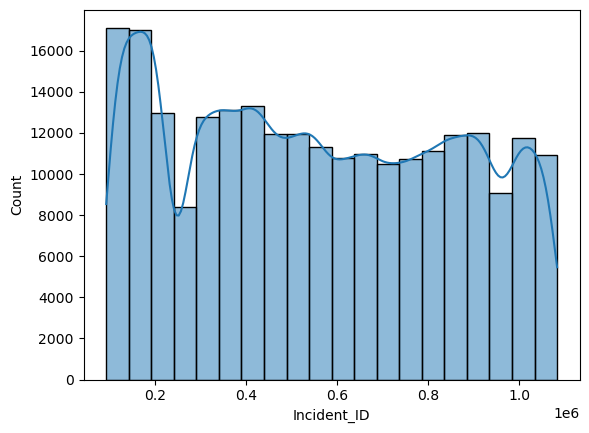

In [48]:
# creating a histogram for extreme values for Incident_ID
hist_incident_id = sns.histplot(gv_df['Incident_ID'], bins = 20, kde = True)

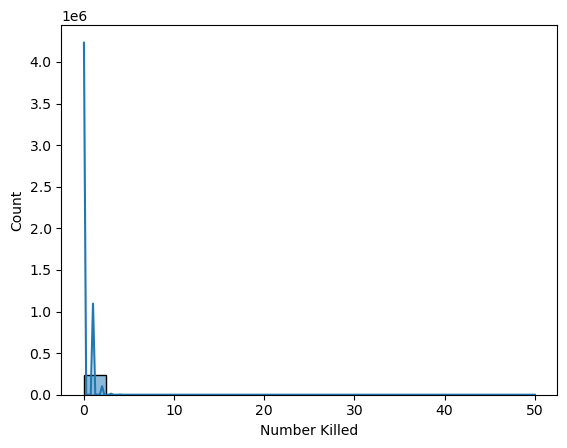

In [49]:
# creating a histogram for extreme values for 'Number Killed'
hist_num_killed = sns.histplot(gv_df['Number Killed'], bins = 20, kde = True)

Extreme values are due to mass shooting. Will need to investigate more if necessary for analysis 

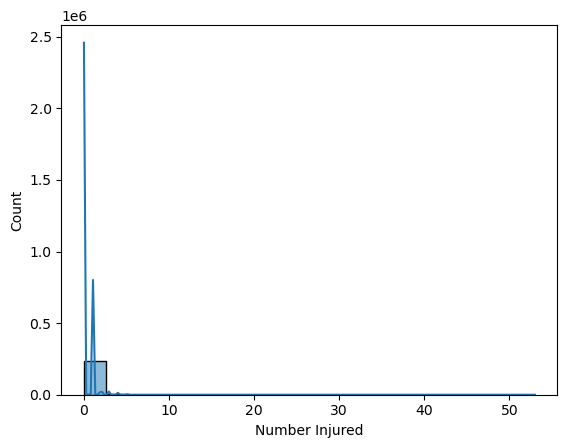

In [51]:
# creating a histogram for extreme values for 'Number Injured'
hist_num_injured = sns.histplot(gv_df['Number Injured'], bins = 20, kde = True)

## 04. Choropleth

### Number Killed

In [54]:
# Creating a data frame with just the 'States' and the values for number killed per individual incident

n_killed_1 = gv_df[['State','Number Killed']]
n_killed_1.head()

,State,Number Killed
0,Pennsylvania,0
1,California,1
2,Ohio,1
3,Colorado,4
4,North Carolina,2


In [55]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_killed_1,
    columns = ['State', 'Number Killed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Killed Participants per State per incident").add_to(map)
folium.LayerControl().add_to(map)

map

In [56]:
# Creating a data frame with just the states and the values for number killed in total for each state

n_killed = gv_df.groupby('State')['Number Killed'].sum().sort_values(ascending=False).reset_index()
n_killed.head()

,State,Number Killed
0,California,5562
1,Texas,5046
2,Florida,3909
3,Illinois,3409
4,Ohio,2508


In [57]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

folium.Choropleth(
    geo_data=country_geo,
    data=n_killed,
    columns=['State', 'Number Killed'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name=" Total Number of Killed Participants in Total per State"
).add_to(map)

folium.LayerControl().add_to(map)
map

In [58]:
# saving html to file path
map.save(os.path.join(path, '04 Visualizations','n_killed_total_per_state.html'))

### Number Injured

In [60]:
# Creating a data frame with just the states and the values for number injured per individual incident
n_injured_1 = gv_df[['State','Number Injured']]
n_injured_1.head()

,State,Number Injured
0,Pennsylvania,4
1,California,3
2,Ohio,3
3,Colorado,0
4,North Carolina,2


In [61]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = n_injured_1,
    columns = ['State', 'Number Injured'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'PuBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Number of Injured Participants per State per Incident").add_to(map)
folium.LayerControl().add_to(map)

map

In [62]:
# Creating a data frame with just the states and the values for number injured in total for each state

n_injured = gv_df.groupby('State')['Number Injured'].sum().sort_values(ascending=False).reset_index()
n_injured.head()

,State,Number Injured
0,Illinois,13514
1,California,7644
2,Florida,7072
3,Texas,6106
4,Ohio,5703


In [63]:
#setting up a folium map with a high level zoom

map = folium.Map(location=[100, 0], zoom_start=1.5)

folium.Choropleth(
    geo_data=country_geo,
    data=n_injured,
    columns=['State', 'Number Injured'],
    key_on='feature.properties.name',
    fill_color='PuBu',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name=" Total Number of Injured Participants per State"
).add_to(map)

folium.LayerControl().add_to(map)
map

In [64]:
# saving html to file path
map.save(os.path.join(path, '04 Visualizations',
'n_injured_total_per_state.html'))

## 05. Results Analysis

Current Questions:
1. Geographic Trends: 
a. Which states or cities experience the highest rates of gun violence? 
b. Are there particular hotspots within these regions? 
2. Temporal Patterns: 
a. What are the monthly or seasonal trends in gun violence incidents? 
b. Are there specific time of the year when incidents spike? 
3. Victim and suspect Demographics: 
a. What are the age and gender of the victims vs. suspects? 
b. How do these demographics vary by location or type of incident? 
4. Incident Characteristics: 
a. What types of incidents (i.e. mass shootings, domestic disputes) are most 
common? 
5. Environmental Factors: 
a. Are there correlations between gun violence and socioeconomic factors like employment rates?

As seen in the maps, injuries and deaths vary across states. This help's us with answering question one, geographical trends. For the 'Numbers Killed' map, states like Texas, California, and Florida are shown in darker shades, indicating these areas have higher numbers of killed participants. This suggests that these states might have more severe or frequent incidents of gun violence.For the 'Numbers Injured', states like California, Texas, and Illinois appear darker, indicating a higher number of injured participants. States with lighter shades of blue, such as those in the Mountain West region, have fewer injured participants.

This leads to ask a question how the incidents vary accross cities and counties. Is the gun violence more prevalent in the urban or rural areas? 


## 06. Exporting Dataframe

In [69]:
# exporting dataframe to csv
gv_df.to_csv(os.path.join(path, '02 Data', 'Prepared Data',
'6.3_gun_violence_cleaned.csv'))